In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path using a raw string (r prefix)
file_path = '/content/drive/MyDrive/Chair-366.csv'

# Load the data using pandas
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)

Mounted at /content/drive
       1  Parts  Length  Volume  Form  Time
0    NaN      1      95    1710     2  6.47
1    NaN      2      50     810     2  3.25
2    NaN      3      35    4050     3  8.27
3    NaN      4      40     260     1  3.35
4    NaN      5      40     437     1  3.68
..   ...    ...     ...     ...   ...   ...
331  NaN      4      40     260     1  3.17
332  NaN      5      40     437     1  2.25
333  NaN      6      25     240     1  2.25
334  NaN      7      30     350     1  1.17
335  NaN      8      20     200     1  1.50

[336 rows x 6 columns]


#ANN-R2=0.97

Epoch [100/9000], Train Loss: 24.8324, Val Loss: 21.1966
Epoch [200/9000], Train Loss: 16.3899, Val Loss: 14.6619
Epoch [300/9000], Train Loss: 13.1892, Val Loss: 11.0500
Epoch [400/9000], Train Loss: 10.1649, Val Loss: 6.7710
Epoch [500/9000], Train Loss: 7.2462, Val Loss: 3.7132
Epoch [600/9000], Train Loss: 5.4919, Val Loss: 2.1603
Epoch [700/9000], Train Loss: 4.9963, Val Loss: 1.5933
Epoch [800/9000], Train Loss: 4.8046, Val Loss: 1.3509
Epoch [900/9000], Train Loss: 4.7248, Val Loss: 1.2521
Epoch [1000/9000], Train Loss: 4.6831, Val Loss: 1.2026
Epoch [1100/9000], Train Loss: 4.6522, Val Loss: 1.1739
Epoch [1200/9000], Train Loss: 4.6334, Val Loss: 1.1563
Epoch [1300/9000], Train Loss: 4.6196, Val Loss: 1.1511
Epoch [1400/9000], Train Loss: 4.6084, Val Loss: 1.1391
Epoch [1500/9000], Train Loss: 4.5971, Val Loss: 1.1298
Epoch [1600/9000], Train Loss: 4.5875, Val Loss: 1.1255
Epoch [1700/9000], Train Loss: 4.5774, Val Loss: 1.1207
Epoch [1800/9000], Train Loss: 4.5668, Val Loss: 1

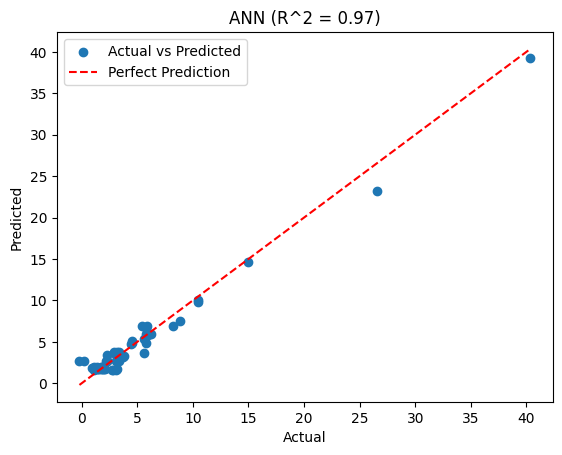

R2 Score: 0.9641
Mean Squared Error: 1.1934
Predicted Data: [14.848103   1.238411   7.105788   3.851729   2.3703084  7.105788
  2.3703084  3.4624872  1.8849015  3.851729   1.7374086  2.6290817
  2.6290817  1.8849015  1.238411  46.164677   1.238411   5.9868555
  1.7374086  4.0135736  1.9057434  3.851729   3.4624872  1.8849015
  4.0135736  3.426135   7.9745083  2.3703084  1.9057434  5.590711
  1.8849015  5.059705   2.3703084  3.4624872  4.6175494  2.8253937
  3.851729   4.0135736  5.9624996  1.9057434  1.9057434  2.6290817
  9.745275   4.360978   1.238411   4.360978   1.9057434  2.3703084
  8.716141   2.3703084  3.851729   7.105788   1.7374086  1.9057434
  3.4624872  2.8253937  6.387416   1.7374086  2.3703084  1.9057434
  1.9057434  5.9624996 27.524069   3.4624872  1.9057434  6.0611095
  3.851729   2.3703084]
Actual Data: [14.95  2.72  5.87  3.22  2.25  8.17  0.2   3.33  1.37  3.38  1.1   2.95
  3.35  1.75  3.12 40.35  1.08  5.92  1.43  2.9   1.4   3.68  3.83  1.07
  3.1   3.18  8.8   3.

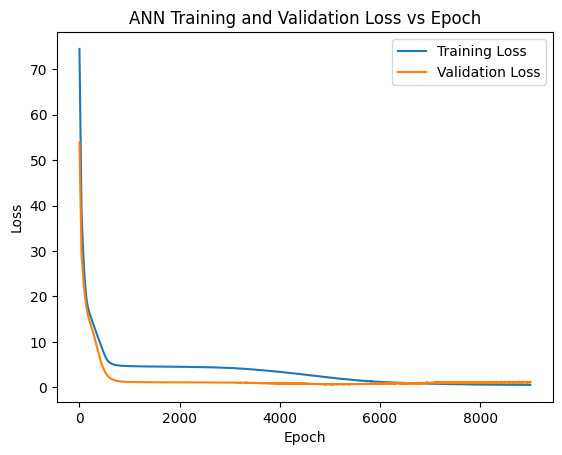

<All keys matched successfully>

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor

# Load the data
file_path = '/content/drive/MyDrive/Chair-366.csv'
df = pd.read_csv(file_path)

# Extract features and labels
X = df[['Parts', 'Length', 'Volume', 'Form']]
y = df['Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Data Augmentation: Add Gaussian noise to training data
def add_noise(X, noise_factor=0.01):
    noise = np.random.normal(loc=0, scale=noise_factor, size=X.shape)
    return X + noise

# Augmented training data
X_train_augmented = add_noise(X_train_normalized)

# Convert augmented numpy arrays to tensors
X_train_augmented_tensor = torch.FloatTensor(X_train_augmented)

# Convert numpy arrays to tensors
X_train_tensor = torch.FloatTensor(X_train_normalized)
X_test_tensor = torch.FloatTensor(X_test_normalized)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Define the neural network model
class EMCModel(nn.Module):
    def __init__(self, input_size):
        super(EMCModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Increase number of neurons in the first hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)  # Add an additional hidden layer
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)  # Add activation function after the second hidden layer
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
model = EMCModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 9000  # Increase the number of epochs
train_losses = []
val_losses = []
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_augmented_tensor)  # Using augmented data
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Calculate validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Calculate R-squared
r_squared = r2_score(y_test, test_predictions)

# Plot predicted vs actual data
plt.scatter(y_test, test_predictions, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')  # Adding the line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'ANN (R^2 = {r_squared:.2f})')  # Adding R-squared to the title
plt.legend()
plt.show()

# Calculate R2 and MSE
r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())
mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())

print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Print predicted and actual data
predicted_data = test_outputs.numpy().flatten()
actual_data = y_test_tensor.numpy().flatten()

print("Predicted Data:", predicted_data)
print("Actual Data:", actual_data)

# Plot loss vs epoch
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Training and Validation Loss vs Epoch')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'drive/MyDrive/checkpoints/ANN-R2=0.96.pth')

# Load the model from checkpoint path
model.load_state_dict(torch.load('drive/MyDrive/checkpoints/ANN-R2=0.96.pth'))


Epoch [100/7000], Train Loss: 47.3488, Val Loss: 34.3672
Epoch [200/7000], Train Loss: 34.3652, Val Loss: 26.5167
Epoch [300/7000], Train Loss: 26.3057, Val Loss: 21.2992
Epoch [400/7000], Train Loss: 21.8900, Val Loss: 18.4028
Epoch [500/7000], Train Loss: 19.7530, Val Loss: 17.0167
Epoch [600/7000], Train Loss: 18.4114, Val Loss: 16.0103
Epoch [700/7000], Train Loss: 17.4634, Val Loss: 15.2493
Epoch [800/7000], Train Loss: 16.7052, Val Loss: 14.6216
Epoch [900/7000], Train Loss: 16.0030, Val Loss: 14.0401
Epoch [1000/7000], Train Loss: 15.4141, Val Loss: 13.4862
Epoch [1100/7000], Train Loss: 14.8881, Val Loss: 12.9233
Epoch [1200/7000], Train Loss: 14.3515, Val Loss: 12.3420
Epoch [1300/7000], Train Loss: 13.8321, Val Loss: 11.6840
Epoch [1400/7000], Train Loss: 13.3484, Val Loss: 11.0150
Epoch [1500/7000], Train Loss: 12.8384, Val Loss: 10.2818
Epoch [1600/7000], Train Loss: 12.3414, Val Loss: 9.5578
Epoch [1700/7000], Train Loss: 11.8759, Val Loss: 8.8610
Epoch [1800/7000], Train 

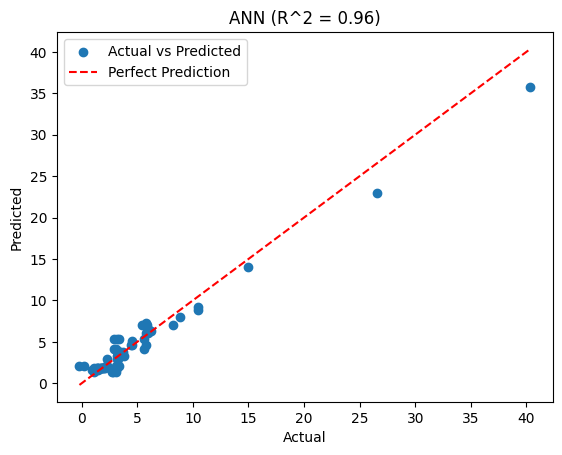

R2 Score: 0.9648
Mean Squared Error: 1.1696
Predicted Data: [14.298311   1.5355753  7.066503   3.9060175  2.3496706  7.066503
  2.3496706  3.269542   1.8322717  3.9060175  1.6104196  3.0584452
  3.0584452  1.8322717  1.5355753 35.71275    1.5355753  6.084928
  1.6104196  4.1799617  1.7457923  3.9060175  3.269542   1.8322717
  4.1799617  2.3304873  8.142604   2.3496706  1.7457923  5.6134605
  1.8322717  5.044811   2.3496706  3.269542   4.616801   2.8942955
  3.9060175  4.1799617  6.003848   1.7457923  1.7457923  3.0584452
  9.323525   4.4916167  1.5355753  4.4916167  1.7457923  2.3496706
  9.121535   2.3496706  3.9060175  7.066503   1.6104196  1.7457923
  3.269542   2.8942955  6.583425   1.6104196  2.3496706  1.7457923
  1.7457923  6.003848  22.83508    3.269542   1.7457923  6.634009
  3.9060175  2.3496706]
Actual Data: [14.95  2.72  5.87  3.22  2.25  8.17  0.2   3.33  1.37  3.38  1.1   2.95
  3.35  1.75  3.12 40.35  1.08  5.92  1.43  2.9   1.4   3.68  3.83  1.07
  3.1   3.18  8.8   3.3

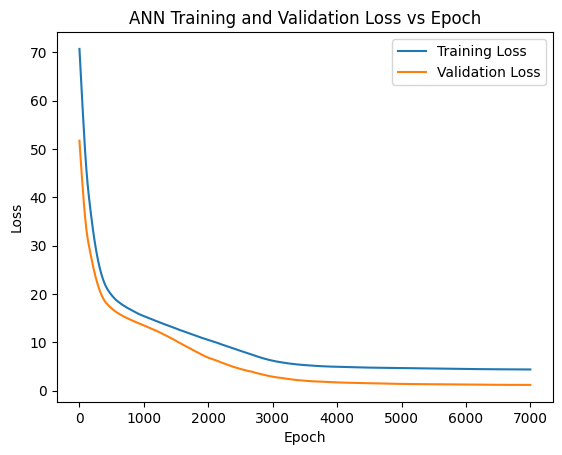

<All keys matched successfully>

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor

# Load the data
file_path = '/content/drive/MyDrive/Chair-366.csv'
df = pd.read_csv(file_path)

# Extract features and labels
X = df[['Parts', 'Length', 'Volume', 'Form']]
y = df['Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Data Augmentation: Add Gaussian noise to training data
def add_noise(X, noise_factor=0.01):
    noise = np.random.normal(loc=0, scale=noise_factor, size=X.shape)
    return X + noise

# Augmented training data
X_train_augmented = add_noise(X_train_normalized)

# Convert augmented numpy arrays to tensors
X_train_augmented_tensor = torch.FloatTensor(X_train_augmented)

# Convert numpy arrays to tensors
X_train_tensor = torch.FloatTensor(X_train_normalized)
X_test_tensor = torch.FloatTensor(X_test_normalized)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

# Define the neural network model
class EMCModel(nn.Module):
    def __init__(self, input_size):
        super(EMCModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
model = EMCModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 7000
train_losses = []
val_losses = []
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_augmented_tensor)  # Using augmented data
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Calculate validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Define the base model
base_model = EMCModel(input_size)

# Define the wrapper class
class TorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        input_size = X.shape[1]
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y).view(-1, 1)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)

        epochs = 6000
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        X_tensor = torch.FloatTensor(X)
        with torch.no_grad():
            predictions = self.model(X_tensor)
        return predictions.numpy()

# Instantiate the wrapper
wrapper_model = TorchRegressor(base_model)

# Define the bagging regressor with the wrapper model
bagging_model = BaggingRegressor(wrapper_model, n_estimators=10, random_state=42)

# Train the bagging model
bagging_model.fit(X_train_augmented, y_train)

# Evaluate the bagging model on the test set
test_predictions = bagging_model.predict(X_test_normalized)
bagging_mse = mean_squared_error(y_test, test_predictions)
bagging_r2 = r2_score(y_test, test_predictions)

print(f'Bagging Model - Mean Squared Error: {bagging_mse:.4f}')
print(f'Bagging Model - R2 Score: {bagging_r2:.4f}')

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, test_predictions)

# Plot predicted vs actual data
plt.scatter(y_test, test_predictions, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')  # Adding the line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'ANN (R^2 = {r_squared:.2f})')  # Adding R-squared to the title
plt.legend()
plt.show()

# Calculate R2 and MSE
r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())
mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())

print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Print predicted and actual data
predicted_data = test_outputs.numpy().flatten()
actual_data = y_test_tensor.numpy().flatten()

print("Predicted Data:", predicted_data)
print("Actual Data:", actual_data)

# Plot loss vs epoch
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Training and Validation Loss vs Epoch')
plt.legend()
plt.show()

# Save the model
torch.save(model.state_dict(), 'drive/MyDrive/checkpoints/ANN-R2=0.96.pth')

# Load the model from checkpoint path
model.load_state_dict(torch.load('drive/MyDrive/checkpoints/ANN-R2=0.96.pth'))

#ANN- R2=0.99

In [ ]:
# Extract features and labels
features = df[['Parts', 'Length', 'Volume', 'Form']]
labels = df['Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
class EMCModel(nn.Module):
    def __init__(self, input_size):
        super(EMCModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)   # Define another layer with different output size

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = X.shape[1]
model = EMCModel(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from sklearn.metrics import r2_score, mean_squared_error

# Train the model
epochs = 6000
model.train()  # Set the model to training mode
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)

    # Compute the loss
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Calculate R2 and MSE
    r2 = r2_score(y_test.numpy(), test_outputs.detach().numpy())
    mse = mean_squared_error(y_test.numpy(), test_outputs.detach().numpy())
    mape = np.mean(np.abs((y_test.numpy() - test_outputs.detach().numpy()) / y_test.numpy())) * 100

    print(f'R2 Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'MAPE: {mape:.4f}')

    # Print predicted and actual data
    predicted_data = test_outputs.numpy().flatten()
    actual_data = y_test.numpy().flatten()

    print("Predicted Data:", predicted_data)
    print("Actual Data:", actual_data)

Epoch [100/6000], Loss: 69.9968
Epoch [200/6000], Loss: 11.8226
Epoch [300/6000], Loss: 8.5508
Epoch [400/6000], Loss: 8.0995
Epoch [500/6000], Loss: 7.5921
Epoch [600/6000], Loss: 7.0326
Epoch [700/6000], Loss: 6.4227
Epoch [800/6000], Loss: 5.7636
Epoch [900/6000], Loss: 5.0578
Epoch [1000/6000], Loss: 4.3126
Epoch [1100/6000], Loss: 3.5445
Epoch [1200/6000], Loss: 2.7810
Epoch [1300/6000], Loss: 2.0616
Epoch [1400/6000], Loss: 1.4273
Epoch [1500/6000], Loss: 0.9148
Epoch [1600/6000], Loss: 0.5406
Epoch [1700/6000], Loss: 0.2952
Epoch [1800/6000], Loss: 0.1516
Epoch [1900/6000], Loss: 0.0767
Epoch [2000/6000], Loss: 0.0417
Epoch [2100/6000], Loss: 0.0270
Epoch [2200/6000], Loss: 0.0214
Epoch [2300/6000], Loss: 0.0194
Epoch [2400/6000], Loss: 0.0188
Epoch [2500/6000], Loss: 0.0186
Epoch [2600/6000], Loss: 0.0186
Epoch [2700/6000], Loss: 0.0186
Epoch [2800/6000], Loss: 0.0186
Epoch [2900/6000], Loss: 0.0186
Epoch [3000/6000], Loss: 0.0186
Epoch [3100/6000], Loss: 0.0186
Epoch [3200/600

#Random Forest

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the data
file_path = '/content/drive/MyDrive/Chair-366.csv'
df = pd.read_csv(file_path)

# Extract features and labels
X = df[['Parts', 'Length', 'Volume', 'Form']]
y = df['Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Data Augmentation: Add Gaussian noise to training data
def add_noise(X, noise_factor=0.01):
    noise = np.random.normal(loc=0, scale=noise_factor, size=X.shape)
    return X + noise

# Augmented training data
X_train_augmented = add_noise(X_train_normalized)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_augmented, y_train)

best_rf = grid_search.best_estimator_

# Evaluate the model on the test set
test_predictions = best_rf.predict(X_test_normalized)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')





Mean Squared Error: 0.8453
R2 Score: 0.9746


#Gradient Boosting

Cross-Validation R2 Scores: [0.86935117 0.40915751 0.91064941 0.91726015 0.87759989]
Mean R2 Score: 0.7968036278009092

Mean Squared Error: 1.5589
R2 Score: 0.9531


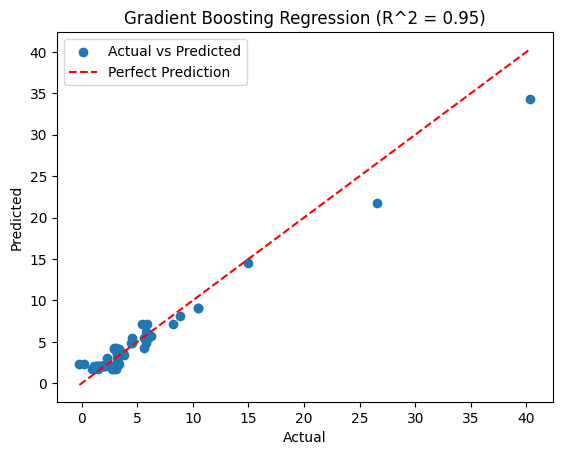

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Load the data
file_path = '/content/drive/MyDrive/Chair-366.csv'
df = pd.read_csv(file_path)

# Extract features and labels
X = df[['Parts', 'Length', 'Volume', 'Form']]
y = df['Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_normalized, y_train)

best_gb = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_gb, X_train_normalized, y_train, cv=5)
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))

# Evaluate the model on the test set
test_predictions = best_gb.predict(X_test_normalized)
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'\nMean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

# Plot predicted vs actual data
plt.scatter(y_test, test_predictions, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Gradient Boosting Regression (R^2 = {r2:.2f})')
plt.legend()
plt.show()
